In [1]:
import pdftotext
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
from gensim.models import Word2Vec

In [2]:
with open("war_and_peace.pdf", "rb") as f:
    pdf = pdftotext.PDF(f)

In [3]:
 
# Save all text to a txt file.
with open('wp.txt', 'w') as f:
    f.write("\n\n".join(pdf))

In [4]:
df = pd.read_fwf('wp.txt')

In [5]:
df[:5]

,War and Peace
0,By Leo Tolstoy
1,Translated by Louise and Aylmer Maude
2,Published by Planet eBook. Visit the site to d...
3,"eBooks of classic literature, books and novels."
4,This work is licensed under a Creative Commons...


In [6]:
data = df['War and Peace'].map(word_tokenize)

In [7]:
data[:5]

0                                   [By, Leo, Tolstoy]
1         [Translated, by, Louise, and, Aylmer, Maude]
2    [Published, by, Planet, eBook, ., Visit, the, ...
3    [eBooks, of, classic, literature, ,, books, an...
4    [This, work, is, licensed, under, a, Creative,...
Name: War and Peace, dtype: object

In [8]:
model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)

In [9]:
model.train(data, total_examples=model.corpus_count, epochs=10)

(4861850, 6904600)

In [10]:
wv = model.wv

In [11]:
wv.most_similar('Tsar')

[('Rhetor', 0.7533652782440186),
 ('Mason', 0.7477074265480042),
 ('doctor', 0.73775714635849),
 ('vice-King', 0.7333962321281433),
 ('vicomte', 0.7300015687942505),
 ('troopsours', 0.7293374538421631),
 ('squadwon', 0.7288943529129028),
 ('mummers', 0.7224324941635132),
 ('division', 0.7194356918334961),
 ('Governor', 0.7181448936462402)]

In [12]:
wv.most_similar(positive=['Tsar', 'woman'], negative='Man')

[('docto', 0.572014570236206),
 ('count', 0.5625014305114746),
 ('prince', 0.5234476327896118),
 ('ros', 0.5178815722465515),
 ('doctor', 0.49594610929489136),
 ('countess', 0.4554111659526825),
 ('ovna', 0.4538498818874359),
 ('way', 0.4460659921169281),
 ('ressed', 0.44049161672592163),
 ('Emperor', 0.43697065114974976)]

In [13]:
wp = ' '.join(df['War and Peace'].values)

In [14]:
wpsplit = wp.split(' ')

In [15]:
wpsplit.remove('')

In [16]:
wpdict = {}
for i in wpsplit:
    if i not in wpdict.keys():
        wpdict[i] =1
    else:
        wpdict[i] += 1

In [17]:
i_sort = sorted(wpdict, key=wpdict.get, reverse=True)

In [18]:
stop = list(set(stopwords.words('english')))

In [19]:
i_sort.remove('')

In [40]:
more_stop = ['and',
 'of',
 'in',
 'he',
 'was',
 'at',
 'not',
 'as',
 'it',
 'I',
 'but',
 'she',
 'The',
 'said',
 'were',
 'be',
 'which',
 'who',
 'one',
 'He',
 'an',
 'he',
 'as',
 'she',
 'be',
 'He',
 'Planet',
 'eBooks',
 'Free',
 'eBook.com',
 'could',
 'no',
 'will',
 'now',
 'went',
 'But',
 'And',
 'him.',
 'man',
 '‘I',
 'old',
 'him,',
 'She',
 'would',
 'eBook.com',
 'him.',
 'him,',
 'like',
 'came',
 'looked',
 'time',
 'began',
 'know',
 'without',
 'face',
 'thought',
 'felt',
 'see',
 'still',
 'ing',
 'men',
 'It',
 'seemed',
 'left',
 'go',
 'little',
 'come',
 'In',
 'eyes',
 'two',
 'even',
 'must',
 'long',
 'saw',
 'made',
 'something',
 'go',
 'come',
 'always',
 'it.',
 'heard',
 'say',
 'army',
 'and,',
 'young',
 'took',
 'told',
 'don’t',
 'back']

In [41]:
for i in i_sort:
    if i in stop:
        i_sort.remove(i)

In [42]:
for i in i_sort:
    if i in more_stop:
        i_sort.remove(i)

In [43]:
i_sort[:10]

['Prince',
 'Pierre',
 'War',
 'Natasha',
 'Andrew',
 'French',
 'Peace',
 'first',
 'asked',
 'whole']

In [44]:
sortdict = {}
for i in i_sort:
    sortdict[i] = wpdict[i]

In [50]:
top20 = list(sortdict.keys())[:20]

In [51]:
top20val = list(sortdict.values())[:20]

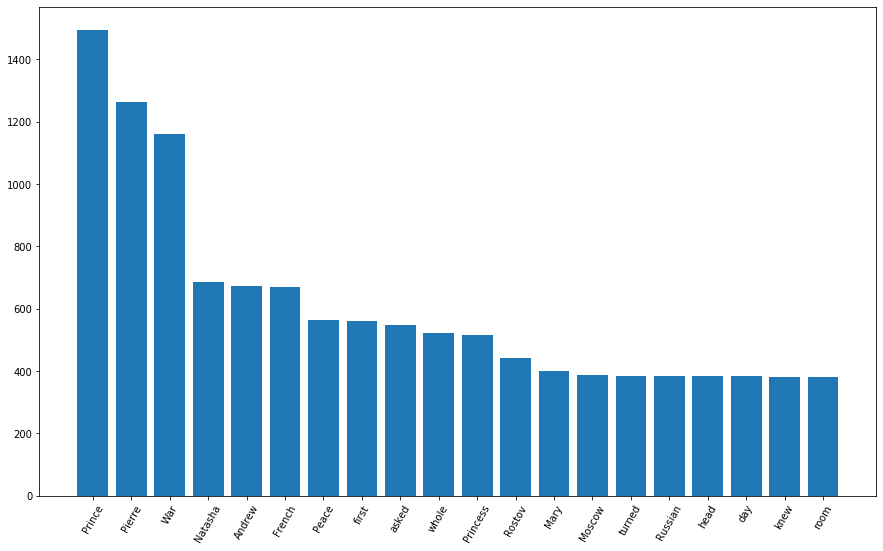

In [52]:
plt.figure(figsize = (15,9))
plt.bar(top20, top20val)
plt.xticks(rotation=60)
plt.show()